# Data Visualization Cheat Sheet

This notebook provides a comprehensive guide to common data visualization techniques used in data science and machine learning. Each section includes explanations, reusable functions, and practical examples with mock data.

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Set seaborn style for better-looking plots
sns.set_style("whitegrid")

## 1) Line Plot

**Use Case:** Visualize trends over time or continuous relationships between variables. Perfect for time series data, showing progression, or comparing multiple series.

**When to use:** Stock prices, temperature changes, sales trends, model training history.

In [60]:
def plot_line(x, y, xlabel="x", ylabel="y", title="Line Plot"):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title)
    plt.show()

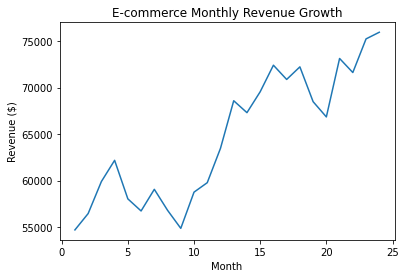

In [61]:
# Mock Data: Monthly revenue for an e-commerce company over 2 years
months = np.arange(1, 25)  # 24 months
base_revenue = 50000  # Starting revenue
growth_rate = 1200  # Monthly growth
seasonal = 5000 * np.sin(2 * np.pi * months / 12)  # Seasonal variation
noise = np.random.normal(0, 2000, len(months))  # Random fluctuation
revenue = base_revenue + growth_rate * months + seasonal + noise

plot_line(months, revenue, xlabel="Month", ylabel="Revenue ($)", title="E-commerce Monthly Revenue Growth")

## 2) Scatter Plot

**Use Case:** Visualize relationships between two continuous variables. Helps identify correlations, patterns, clusters, and outliers.

**When to use:** Feature correlation analysis, predicted vs actual values in regression, exploring data distributions, identifying anomalies.

In [115]:
def plot_scatter(x, y, xlabel="x", ylabel="y", title="Scatter", color=None, label=None):
    """
    Single dataset scatter plot.
    
    Parameters:
    -----------
    x, y : array-like
        Data coordinates
    color : str, optional
        Color for points (e.g., 'red', 'blue', '#FF5733')
    label : str, optional
        Label for legend
    """
    plt.figure()
    plt.scatter(x, y, c=color, label=label)
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title)
    if label:
        plt.legend()
    plt.show()

def plot_scatter_multiple(datasets, xlabel="x", ylabel="y", title="Scatter", colors=None, labels=None):
    """
    Multiple datasets scatter plot with different colors.
    
    Parameters:
    -----------
    datasets : list of tuples
        List of (x, y) data pairs: [(x1, y1), (x2, y2), ...]
    colors : list of str, optional
        Colors for each dataset. If None, uses default color cycle.
    labels : list of str, optional
        Labels for each dataset for legend
    
    Example:
    --------
    data1 = (x1, y1)
    data2 = (x2, y2)
    plot_scatter_multiple([data1, data2], colors=['red', 'blue'], labels=['Group A', 'Group B'])
    """
    plt.figure()
    
    if colors is None:
        colors = [None] * len(datasets)  # Use default colors
    if labels is None:
        labels = [None] * len(datasets)
    
    for i, (x, y) in enumerate(datasets):
        plt.scatter(x, y, c=colors[i], label=labels[i], alpha=0.6)
    
    plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(title)
    
    if any(label is not None for label in labels):
        plt.legend()
    
    plt.show()


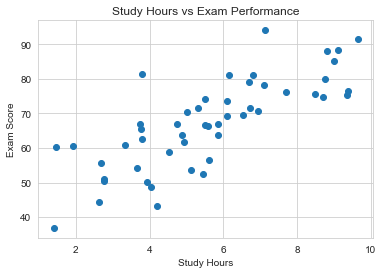

In [116]:
# Mock Data: Study hours vs exam scores for 50 students
study_hours = np.random.uniform(1, 10, 50)  # Study hours between 1-10
base_score = 40  # Base score
score_increase = 5  # Points per hour of study
exam_scores = base_score + score_increase * study_hours + np.random.normal(0, 8, 50)  # With some noise
exam_scores = np.clip(exam_scores, 0, 100)  # Keep scores between 0-100

plot_scatter(study_hours, exam_scores, xlabel="Study Hours", ylabel="Exam Score", title="Study Hours vs Exam Performance")

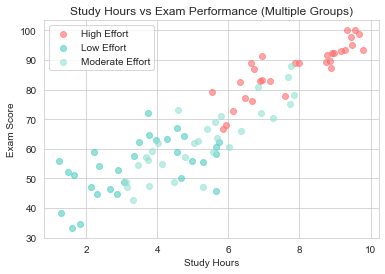

In [117]:
# Example: Multiple groups with different colors
# Class A students (high effort): more study hours, better scores
study_hours_A = np.random.uniform(5, 10, 30)
exam_scores_A = 40 + 6 * study_hours_A + np.random.normal(0, 5, 30)
exam_scores_A = np.clip(exam_scores_A, 0, 100)

# Class B students (low effort): fewer study hours, lower scores
study_hours_B = np.random.uniform(1, 6, 30)
exam_scores_B = 40 + 4 * study_hours_B + np.random.normal(0, 8, 30)
exam_scores_B = np.clip(exam_scores_B, 0, 100)

# Class C students (moderate effort)
study_hours_C = np.random.uniform(3, 8, 30)
exam_scores_C = 40 + 5 * study_hours_C + np.random.normal(0, 6, 30)
exam_scores_C = np.clip(exam_scores_C, 0, 100)

# Plot multiple datasets with different colors
plot_scatter_multiple(
    [(study_hours_A, exam_scores_A), (study_hours_B, exam_scores_B), (study_hours_C, exam_scores_C)],
    colors=['#FF6B6B', '#4ECDC4', '#95E1D3'],
    labels=['High Effort', 'Low Effort', 'Moderate Effort'],
    xlabel="Study Hours", 
    ylabel="Exam Score",
    title="Study Hours vs Exam Performance (Multiple Groups)"
)

### Predicted vs Target Plot (Regression Evaluation)

**Use Case:** Evaluate regression model performance by comparing predicted values against actual target values.

**Components:**
- **Scatter points**: Each point represents (target, prediction) for one sample
- **Diagonal line**: Perfect prediction line (y=x). Points on this line have perfect predictions.
- **Distance from line**: Shows prediction error

**Interpretation:**
- Points close to diagonal line = good predictions
- Points above line = model over-predicted
- Points below line = model under-predicted

**When to use:** Model validation, comparing different models, identifying systematic bias in predictions.

In [118]:
def plot_predicted_vs_target(y_true, y_pred, title="Predicted vs Target"):
    """
    Plot predicted values vs actual target values with perfect prediction line.
    
    Parameters:
    -----------
    y_true : array-like
        Actual target values
    y_pred : array-like
        Predicted values from model
    title : str
        Plot title
    """
    plt.figure(figsize=(8, 8))
    
    # Scatter plot of predictions vs targets
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5, label='Predictions')
    
    # Perfect prediction line (diagonal)
    min_val = min(np.min(y_true), np.min(y_pred))
    max_val = max(np.max(y_true), np.max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    plt.xlabel("Target (Actual)", fontsize=12)
    plt.ylabel("Predicted", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')  # Make axes equal scale
    plt.tight_layout()
    plt.show()


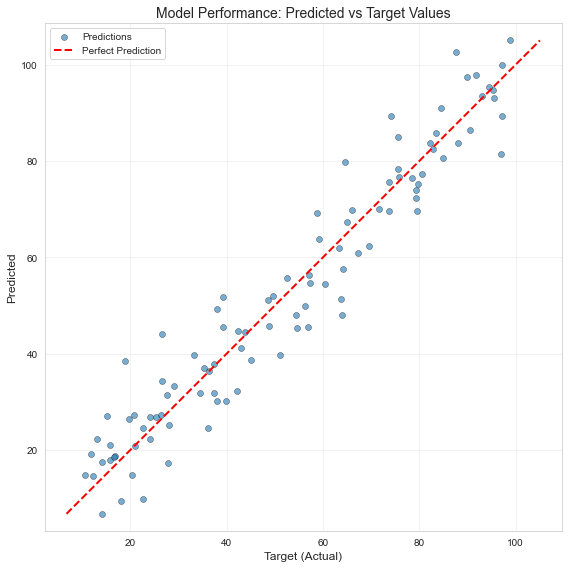

In [119]:
# Example: Regression model predictions
np.random.seed(42)
n_samples = 100

# True target values
y_true = np.random.uniform(10, 100, n_samples)

# Simulate predictions with some error
# Good model: predictions close to actual with small random error
y_pred = y_true + np.random.normal(0, 8, n_samples)

plot_predicted_vs_target(y_true, y_pred, title="Model Performance: Predicted vs Target Values")

## 3) Histogram

**Use Case:** Display the distribution of a single continuous variable. Shows frequency of values in different ranges (bins).

**When to use:** Understanding data distribution, checking for normality, identifying skewness, analyzing residuals or errors, detecting outliers.

In [64]:
def plot_hist(x, bins=30, xlabel="value", title="Histogram"):
    plt.figure()
    plt.hist(x, bins=bins)
    plt.xlabel(xlabel); plt.title(title)
    plt.show()


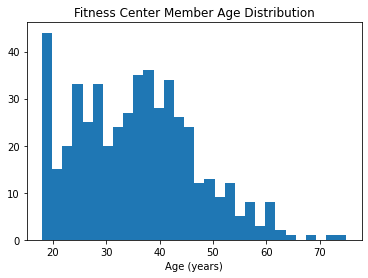

In [65]:
# Mock Data: Customer ages at a fitness center (500 members)
mean_age = 35
std_age = 12
ages = np.random.normal(mean_age, std_age, 500)
ages = np.clip(ages, 18, 75)  # Keep ages realistic

plot_hist(ages, bins=30, xlabel="Age (years)", title="Fitness Center Member Age Distribution")

## 4) Residual Plot

**Use Case:** Diagnose regression model quality. Residuals should be randomly scattered around zero with no patterns. Patterns indicate model problems (non-linearity, heteroscedasticity).

**When to use:** Validating linear regression assumptions, checking if model captures all patterns, identifying problematic predictions.

In [66]:
def plot_residuals(y_true, y_pred):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    resid = y_true - y_pred
    plt.figure()
    plt.scatter(y_pred, resid)
    plt.axhline(0)
    plt.xlabel("predicted")
    plt.ylabel("residual (true - pred)")
    plt.title("Residual Plot")
    plt.show()


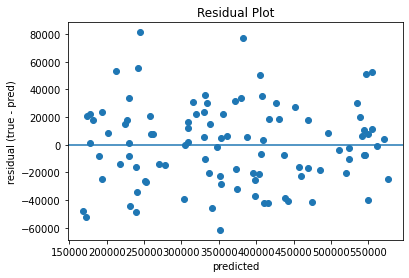

In [67]:
# Mock Data: House price prediction (area in sq ft vs price)
house_area = np.random.uniform(800, 3500, 100)  # Square footage
true_price = 50000 + 150 * house_area + np.random.normal(0, 30000, 100)  # True relationship
predicted_price = 45000 + 152 * house_area  # Model prediction (slightly different)

plot_residuals(true_price, predicted_price)

## 5) Confusion Matrix / Heatmap

**Use Case:** Evaluate classification model performance. Shows true positives, true negatives, false positives, and false negatives. Diagonal elements are correct predictions.

**When to use:** Binary or multi-class classification evaluation, understanding which classes are confused, calculating precision/recall manually.

In [68]:
def plot_confusion(cm, class_names=("0","1"), title="Confusion Matrix"):
    plt.figure()
    plt.imshow(cm)
    plt.xticks(range(len(class_names)), class_names)
    plt.yticks(range(len(class_names)), class_names)
    plt.xlabel("Predicted"); plt.ylabel("True"); plt.title(title)
    plt.colorbar()
    # numbers on cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i,j]), ha="center", va="center")
    plt.show()


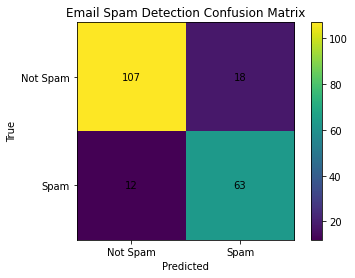

In [69]:
# Mock Data: Email spam classification results (200 emails)
# True labels: 0 = not spam, 1 = spam
y_true_class = np.random.choice([0, 1], size=200, p=[0.7, 0.3])  # 70% not spam, 30% spam

# Model predictions with ~85% accuracy
y_pred_class = y_true_class.copy()
# Introduce some errors
error_indices = np.random.choice(200, size=30, replace=False)
y_pred_class[error_indices] = 1 - y_pred_class[error_indices]

cm = confusion_matrix(y_true_class, y_pred_class)
plot_confusion(cm, class_names=("Not Spam", "Spam"), title="Email Spam Detection Confusion Matrix")

## 6) ROC Curve (Receiver Operating Characteristic)

**Use Case:** Evaluate binary classifier performance across all classification thresholds. AUC (Area Under Curve) of 1.0 is perfect, 0.5 is random guessing. Shows trade-off between true positive rate and false positive rate.

**When to use:** Comparing multiple classifiers, choosing optimal threshold, imbalanced datasets, understanding model discrimination ability.

In [70]:
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true, scores, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{title} (AUC={roc_auc:.4f})")
    plt.show()


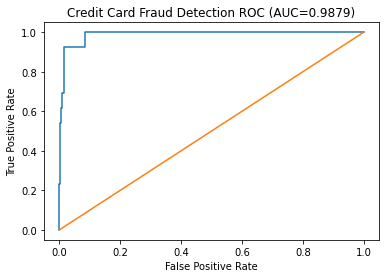

In [71]:
# Mock Data: Credit card fraud detection scores (300 transactions)
n_samples = 300
y_true_roc = np.random.choice([0, 1], size=n_samples, p=[0.95, 0.05])  # 5% fraud rate

# Generate probability scores: fraudulent transactions should have higher scores
scores_roc = np.zeros(n_samples)
scores_roc[y_true_roc == 0] = np.random.beta(2, 5, sum(y_true_roc == 0))  # Legitimate transactions: low scores
scores_roc[y_true_roc == 1] = np.random.beta(5, 2, sum(y_true_roc == 1))  # Fraudulent transactions: high scores

plot_roc(y_true_roc, scores_roc, title="Credit Card Fraud Detection ROC")

## 7) Precision-Recall Curve

**Use Case:** Evaluate binary classifiers, especially useful for imbalanced datasets where positive class is rare. Shows trade-off between precision (exactness) and recall (completeness). Higher average precision (AP) is better.

**When to use:** Imbalanced classes, when false positives and false negatives have different costs, medical diagnosis, information retrieval.

In [72]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_pr(y_true, scores, title="Precision-Recall Curve"):
    p, r, _ = precision_recall_curve(y_true, scores)
    ap = average_precision_score(y_true, scores)
    plt.figure()
    plt.plot(r, p)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{title} (AP={ap:.4f})")
    plt.show()


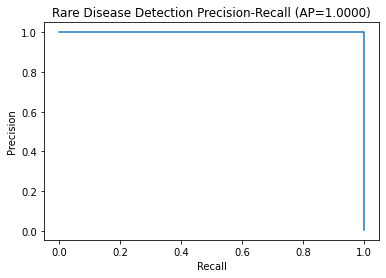

In [73]:
# Mock Data: Disease diagnosis (1% disease prevalence, 400 patients)
n_patients = 400
y_true_pr = np.random.choice([0, 1], size=n_patients, p=[0.99, 0.01])  # 1% have disease

# Generate diagnostic test scores
scores_pr = np.zeros(n_patients)
scores_pr[y_true_pr == 0] = np.random.beta(2, 8, sum(y_true_pr == 0))  # Healthy: low scores
scores_pr[y_true_pr == 1] = np.random.beta(7, 2, sum(y_true_pr == 1))  # Diseased: high scores

plot_pr(y_true_pr, scores_pr, title="Rare Disease Detection Precision-Recall")

## 8) Empirical CDF (Cumulative Distribution Function)

**Use Case:** Show the cumulative probability distribution of a dataset. For any value x, the EDF shows the proportion of observations ≤ x. Useful for comparing distributions and detecting outliers.

**When to use:** Distribution comparison, quantile analysis, hypothesis testing, understanding data spread, detecting distribution differences.

In [74]:
def plot_edf(x, xlabel="x", title="Empirical CDF"):
    x = np.sort(np.asarray(x, float))
    n = len(x)
    Fn = np.arange(1, n+1) / n
    plt.figure()
    plt.step(x, Fn, where="post")
    plt.xlabel(xlabel); plt.ylabel("EDF"); plt.title(title)
    plt.show()


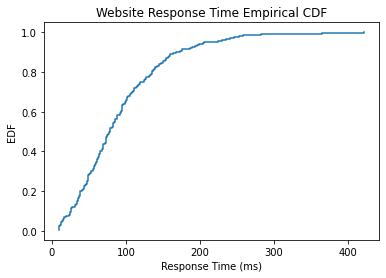

In [75]:
# Mock Data: Website response times in milliseconds (200 requests)
response_times = np.random.gamma(shape=2, scale=50, size=200)  # Right-skewed distribution
response_times = np.clip(response_times, 10, 500)  # Keep realistic

plot_edf(response_times, xlabel="Response Time (ms)", title="Website Response Time Empirical CDF")

In [76]:
import math

def plot_edf_with_dkw(x, alpha=0.05, xlabel="x", title="EDF with DKW Bands"):
    x = np.sort(np.asarray(x, float))
    n = len(x)
    Fn = np.arange(1, n+1) / n
    eps = math.sqrt(math.log(2/alpha)/(2*n))
    lo = np.clip(Fn - eps, 0, 1)
    hi = np.clip(Fn + eps, 0, 1)

    plt.figure()
    plt.step(x, Fn, where="post")
    plt.step(x, lo, where="post")
    plt.step(x, hi, where="post")
    plt.xlabel(xlabel); plt.ylabel("EDF")
    plt.title(f"{title} (eps={eps:.4f})")
    plt.show()


### EDF with DKW Confidence Bands

**Explanation:** Dvoretzky–Kiefer–Wolfowitz (DKW) inequality provides confidence bands around the empirical CDF. The bands show where the true CDF likely lies with (1-α) confidence level.

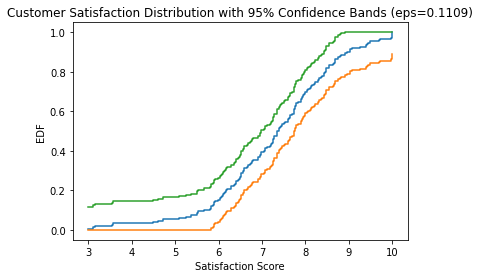

In [77]:
# Mock Data: Customer satisfaction scores (scale 1-10, 150 customers)
satisfaction_scores = np.random.normal(7.5, 1.5, 150)
satisfaction_scores = np.clip(satisfaction_scores, 1, 10)

plot_edf_with_dkw(satisfaction_scores, alpha=0.05, xlabel="Satisfaction Score", title="Customer Satisfaction Distribution with 95% Confidence Bands")

### EDF with Bootstrap Confidence Bands

**Explanation:** Bootstrap resampling creates confidence bands by generating many resampled EDFs. This method is more flexible and doesn't assume any specific distribution, making it suitable for any data type.

In [97]:
def plot_edf_with_bootstrap(x, n_bootstrap=1000, alpha=0.05, xlabel="x", title="EDF with Bootstrap Confidence Bands"):
    """
    Plot EDF with bootstrap confidence bands
    x: data array
    n_bootstrap: number of bootstrap samples
    alpha: significance level (default 0.05 for 95% confidence)
    """
    x = np.asarray(x, float)
    n = len(x)
    x_sorted = np.sort(x)
    Fn = np.arange(1, n+1) / n
    
    # Bootstrap resampling
    bootstrap_edfs = []
    for _ in range(n_bootstrap):
        # Resample with replacement
        x_boot = np.random.choice(x, size=n, replace=True)
        x_boot_sorted = np.sort(x_boot)
        # Interpolate bootstrap EDF to original x values
        Fn_boot = np.interp(x_sorted, x_boot_sorted, np.arange(1, n+1) / n)
        bootstrap_edfs.append(Fn_boot)
    
    bootstrap_edfs = np.array(bootstrap_edfs)
    
    # Calculate percentile-based confidence bands
    lower = np.percentile(bootstrap_edfs, 100 * alpha / 2, axis=0)
    upper = np.percentile(bootstrap_edfs, 100 * (1 - alpha / 2), axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.step(x_sorted, Fn, where="post", label="Empirical CDF", linewidth=2)
    plt.step(x_sorted, lower, where="post", linestyle="--", label=f"{int((1-alpha)*100)}% Confidence Band", alpha=0.7)
    plt.step(x_sorted, upper, where="post", linestyle="--", alpha=0.7)
    plt.fill_between(x_sorted, lower, upper, alpha=0.2, step="post")
    plt.xlabel(xlabel)
    plt.ylabel("EDF")
    plt.title(f"{title} ({n_bootstrap} bootstrap samples)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

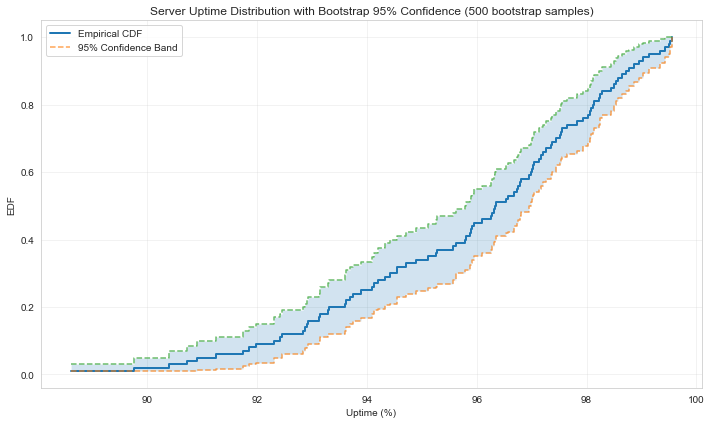

In [98]:
# Mock Data: Server uptime percentages (100 servers over a month)
uptime_data = np.random.beta(50, 2, 100) * 100  # Beta distribution for realistic uptime (mostly high)
uptime_data = np.clip(uptime_data, 85, 100)  # Keep between 85-100%

plot_edf_with_bootstrap(uptime_data, n_bootstrap=500, alpha=0.05, 
                        xlabel="Uptime (%)", title="Server Uptime Distribution with Bootstrap 95% Confidence")

## 9) Explained Variance Plot (PCA)

**Use Case:** Visualize how much variance is captured by principal components in PCA. Helps decide how many components to keep for dimensionality reduction. Goal is to retain most variance with fewer components.

**When to use:** Dimensionality reduction, feature extraction, determining optimal number of PCA components, data compression analysis.

In [78]:
def plot_explained_variance(evr, title="Explained Variance Ratio"):
    evr = np.asarray(evr, float)
    cum = np.cumsum(evr)
    plt.figure()
    plt.plot(np.arange(1, len(evr)+1), cum)
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative explained variance")
    plt.title(title)
    plt.ylim(0, 1.05)
    plt.show()


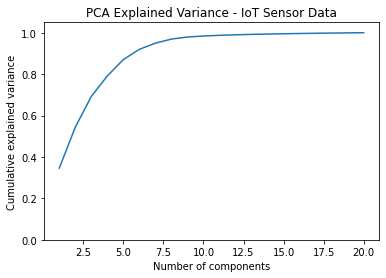

In [79]:
# Mock Data: Explained variance ratios from PCA on 20-dimensional sensor data
# Simulating that first few components capture most variance
n_components = 20
explained_var = np.array([0.35, 0.20, 0.15, 0.10, 0.08, 0.05, 0.03, 0.02] + 
                         [0.01 / (i+1) for i in range(12)])
explained_var = explained_var / explained_var.sum()  # Normalize to sum to 1

plot_explained_variance(explained_var, title="PCA Explained Variance - IoT Sensor Data")

## 10) Learning Curve

**Use Case:** Diagnose model performance as training data size increases. Shows training and validation scores. Helps identify if model suffers from high bias (underfitting) or high variance (overfitting).

**Key Patterns:**
- **High bias:** Both scores are low and converge - model is too simple
- **High variance:** Large gap between training and validation - model is overfitting
- **Good fit:** Both scores are high and close together

**When to use:** Deciding if more training data would help, diagnosing overfitting/underfitting, model capacity assessment.

In [80]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, scoring="accuracy", cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes
    )
    plt.figure()
    plt.plot(sizes, np.mean(train_scores, axis=1))
    plt.plot(sizes, np.mean(val_scores, axis=1))
    plt.xlabel("Training set size")
    plt.ylabel(scoring)
    plt.title("Learning Curve")
    plt.show()

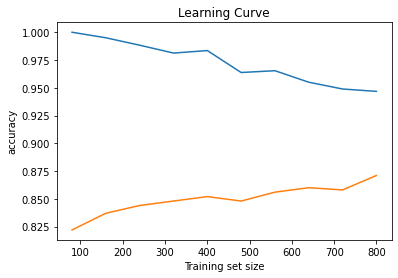

In [81]:
# Mock Data: Binary classification task - predicting customer churn
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic customer churn data
n_samples_lc = 1000
n_features_lc = 10

np.random.seed(42)
X_lc = np.random.randn(n_samples_lc, n_features_lc)
# Create target with some signal
y_lc = (X_lc[:, 0] + X_lc[:, 1] + 0.5 * X_lc[:, 2] + np.random.randn(n_samples_lc) * 0.5 > 0).astype(int)

# Create model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

plot_learning_curve(rf_model, X_lc, y_lc, scoring="accuracy", cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

## 11) Box Plot (with Seaborn)

**Use Case:** Visualize distribution of data showing median, quartiles, and outliers. Excellent for comparing distributions across categories and identifying outliers.

**Key Components:**
- Box: Interquartile range (IQR, 25th-75th percentile)
- Line in box: Median (50th percentile)
- Whiskers: Extend to 1.5×IQR
- Points: Outliers beyond whiskers

**When to use:** Comparing distributions across groups, outlier detection, understanding data spread, A/B testing results.

In [83]:
def plot_boxplot(data, x=None, y=None, title="Box Plot"):
    """
    data: DataFrame or array-like
    x: column name for categories (optional)
    y: column name for values
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x, y=y)
    plt.title(title)
    plt.show()

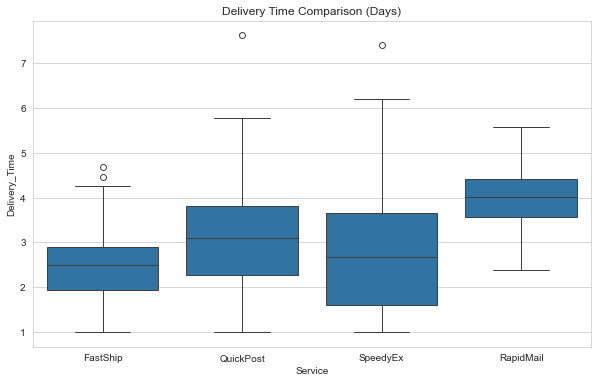

In [84]:
# Mock Data: Product delivery times across 4 delivery services (200 orders each)
import pandas as pd

delivery_services = ['FastShip', 'QuickPost', 'SpeedyEx', 'RapidMail']
delivery_data = []

for service in delivery_services:
    if service == 'FastShip':
        times = np.random.normal(2.5, 0.8, 200)  # Fast and consistent
    elif service == 'QuickPost':
        times = np.random.normal(3.0, 1.2, 200)  # Medium speed
    elif service == 'SpeedyEx':
        times = np.random.normal(2.8, 1.5, 200)  # Fast but variable
    else:  # RapidMail
        times = np.random.normal(4.0, 0.6, 200)  # Slower but consistent
    
    for time in times:
        delivery_data.append({'Service': service, 'Delivery_Time': max(1, time)})

df_delivery = pd.DataFrame(delivery_data)
plot_boxplot(df_delivery, x='Service', y='Delivery_Time', title='Delivery Time Comparison (Days)')

## 12) Violin Plot (with Seaborn)

**Use Case:** Similar to box plot but shows the full distribution shape (density) using kernel density estimation. Combines box plot information with distribution visualization.

**Advantages over box plot:** Shows multimodal distributions, reveals distribution shape, better for understanding data density.

**When to use:** When distribution shape matters, comparing multiple groups, detecting bimodal distributions, presentation-quality visualizations.

In [85]:
def plot_violin(data, x=None, y=None, title="Violin Plot"):
    """
    data: DataFrame or array-like
    x: column name for categories (optional)
    y: column name for values
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x=x, y=y)
    plt.title(title)
    plt.show()

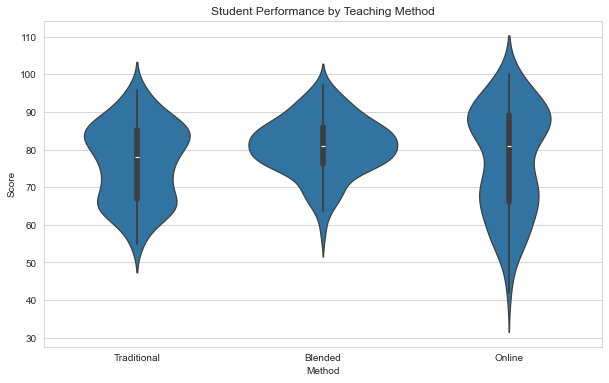

In [86]:
# Mock Data: Test scores across 3 different teaching methods (150 students each)
teaching_methods = ['Traditional', 'Blended', 'Online']
score_data = []

for method in teaching_methods:
    if method == 'Traditional':
        scores = np.concatenate([np.random.normal(70, 10, 100), np.random.normal(85, 5, 50)])  # Bimodal
    elif method == 'Blended':
        scores = np.random.normal(80, 8, 150)  # Normal distribution
    else:  # Online
        scores = np.concatenate([np.random.normal(65, 8, 80), np.random.normal(90, 5, 70)])  # Bimodal
    
    for score in scores:
        score_data.append({'Method': method, 'Score': np.clip(score, 0, 100)})

df_scores = pd.DataFrame(score_data)
plot_violin(df_scores, x='Method', y='Score', title='Student Performance by Teaching Method')

## 13) Correlation Heatmap (with Seaborn)

**Use Case:** Visualize correlation matrix between multiple numerical features. Color intensity shows correlation strength, helping identify multicollinearity and feature relationships.

**Interpretation:**
- Values range from -1 (perfect negative) to +1 (perfect positive)
- 0 indicates no linear correlation
- Diagonal is always 1 (perfect self-correlation)

**When to use:** Feature engineering, multicollinearity detection, feature selection, understanding variable relationships, exploratory data analysis.

In [87]:
def plot_correlation_heatmap(df, title="Correlation Heatmap", annot=True, cmap="coolwarm"):
    """
    df: DataFrame with numerical columns
    annot: Whether to show correlation values in cells
    cmap: Color map (coolwarm, viridis, etc.)
    """
    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=annot, cmap=cmap, center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title(title)
    plt.tight_layout()
    plt.show()

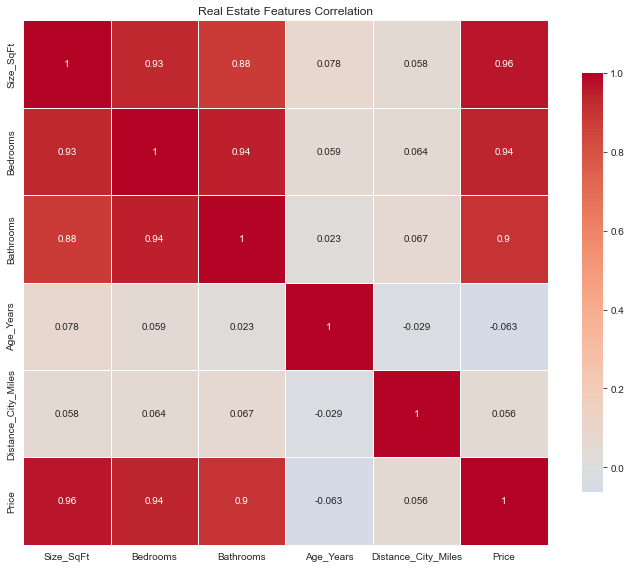

In [88]:
# Mock Data: Real estate features (300 properties)
n_properties = 300

# Generate correlated features
size_sqft = np.random.uniform(1000, 4000, n_properties)
bedrooms = np.round(size_sqft / 600 + np.random.normal(0, 0.5, n_properties))
bathrooms = np.round(bedrooms * 0.75 + np.random.normal(0, 0.3, n_properties))
age_years = np.random.uniform(0, 50, n_properties)
price = (size_sqft * 200 + bedrooms * 30000 + bathrooms * 20000 - age_years * 2000 + 
         np.random.normal(0, 50000, n_properties))
distance_city = np.random.uniform(1, 30, n_properties)

df_realestate = pd.DataFrame({
    'Size_SqFt': size_sqft,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Age_Years': age_years,
    'Distance_City_Miles': distance_city,
    'Price': price
})

plot_correlation_heatmap(df_realestate, title='Real Estate Features Correlation')

## 14) Pair Plot (with Seaborn)

**Use Case:** Create a grid of scatter plots for all pairs of numerical features, with histograms on diagonal. Excellent for multivariate analysis and pattern discovery.

**What it shows:**
- Pairwise relationships between features
- Distribution of each feature (diagonal)
- Patterns colored by categorical variable (optional)

**When to use:** Initial data exploration, feature relationship discovery, classification problem visualization, understanding multidimensional data.

In [89]:
def plot_pairplot(df, hue=None, title="Pair Plot"):
    """
    df: DataFrame
    hue: Column name for color coding (categorical)
    """
    g = sns.pairplot(df, hue=hue, diag_kind='hist', plot_kws={'alpha': 0.6})
    g.fig.suptitle(title, y=1.02)
    plt.show()

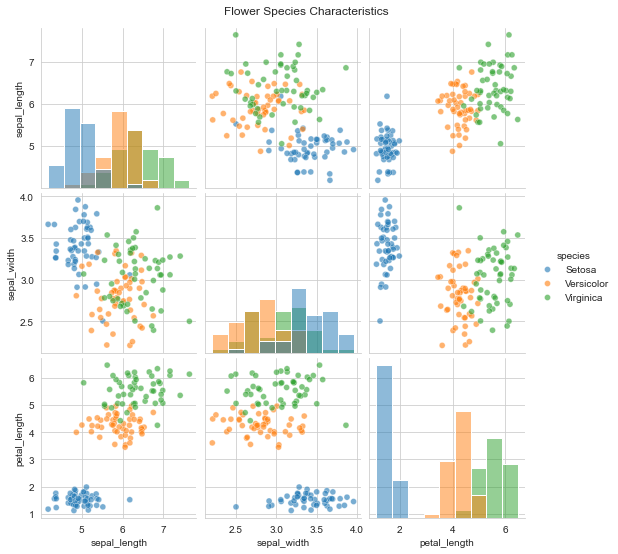

In [90]:
# Mock Data: Iris-like flower measurements (150 samples, 3 species)
n_samples_iris = 50

# Species 1: Setosa (smaller flowers)
setosa = pd.DataFrame({
    'sepal_length': np.random.normal(5.0, 0.3, n_samples_iris),
    'sepal_width': np.random.normal(3.4, 0.3, n_samples_iris),
    'petal_length': np.random.normal(1.5, 0.2, n_samples_iris),
    'species': 'Setosa'
})

# Species 2: Versicolor (medium flowers)
versicolor = pd.DataFrame({
    'sepal_length': np.random.normal(6.0, 0.4, n_samples_iris),
    'sepal_width': np.random.normal(2.8, 0.3, n_samples_iris),
    'petal_length': np.random.normal(4.3, 0.4, n_samples_iris),
    'species': 'Versicolor'
})

# Species 3: Virginica (larger flowers)
virginica = pd.DataFrame({
    'sepal_length': np.random.normal(6.5, 0.5, n_samples_iris),
    'sepal_width': np.random.normal(3.0, 0.3, n_samples_iris),
    'petal_length': np.random.normal(5.5, 0.5, n_samples_iris),
    'species': 'Virginica'
})

df_flowers = pd.concat([setosa, versicolor, virginica], ignore_index=True)
plot_pairplot(df_flowers, hue='species', title='Flower Species Characteristics')

## 15) Bar Plot

**Use Case:** Compare quantities across discrete categories. Shows aggregated values (mean, sum, count) for different groups.

**When to use:** Comparing categories, showing counts or averages, survey results, performance metrics across groups, sales by region/product.

In [91]:
def plot_barplot(data, x, y, title="Bar Plot", estimator='mean', ci=None):
    """
    data: DataFrame
    x: Column name for categories
    y: Column name for values
    estimator: Function to aggregate (mean, sum, median, etc.)
    ci: Confidence interval (None to disable)
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x, y=y, estimator=estimator, ci=ci)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/var/folders/bn/w4ms4n5n7l3czmht6p6ntpjm0000gn/T/ipykernel_11809/3787560667.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x=x, y=y, estimator=estimator, ci=ci)


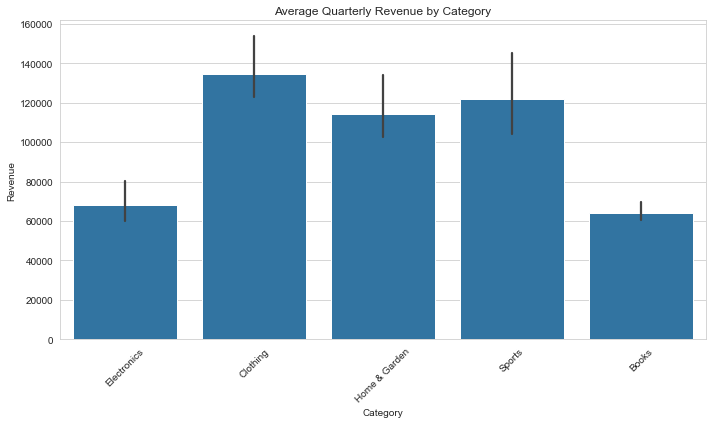

In [92]:
# Mock Data: Average revenue by product category (quarterly data)
categories = ['Electronics', 'Clothing', 'Home & Garden', 'Sports', 'Books']
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

sales_data = []
for cat in categories:
    base_revenue = np.random.uniform(50000, 150000)
    for q in quarters:
        seasonal_factor = 1.0
        if q == 'Q4':
            seasonal_factor = 1.3  # Holiday season boost
        revenue = base_revenue * seasonal_factor * np.random.uniform(0.9, 1.1)
        sales_data.append({'Category': cat, 'Quarter': q, 'Revenue': revenue})

df_sales = pd.DataFrame(sales_data)
plot_barplot(df_sales, x='Category', y='Revenue', title='Average Quarterly Revenue by Category', ci=95)

## 16) Count Plot (with Seaborn)

**Use Case:** Show frequency of categorical variables. Automatically counts occurrences of each category.

**Difference from bar plot:** Count plot counts observations, bar plot shows aggregated values.

**When to use:** Categorical data exploration, class imbalance visualization, survey responses, understanding category distributions.

In [93]:
def plot_countplot(data, x, hue=None, title="Count Plot"):
    """
    data: DataFrame
    x: Column name for categories to count
    hue: Column name for grouping (optional)
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=x, hue=hue)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

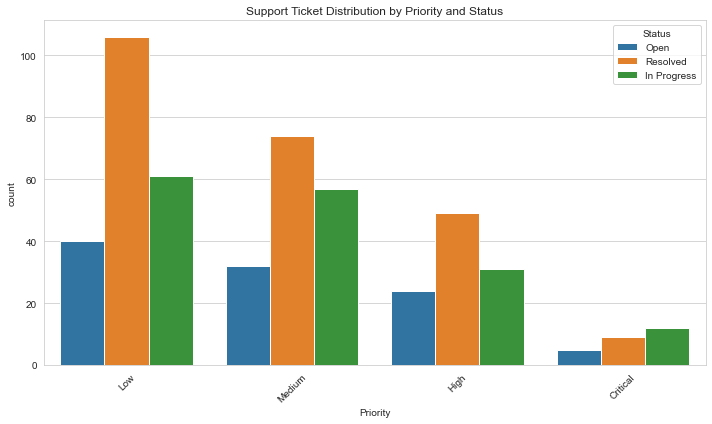

In [94]:
# Mock Data: Customer support tickets by priority and status (500 tickets)
priorities = ['Low', 'Medium', 'High', 'Critical']
statuses = ['Open', 'In Progress', 'Resolved']
ticket_data = []

priority_weights = [0.4, 0.35, 0.20, 0.05]  # More low priority tickets
for _ in range(500):
    priority = np.random.choice(priorities, p=priority_weights)
    status = np.random.choice(statuses, p=[0.2, 0.3, 0.5])
    ticket_data.append({'Priority': priority, 'Status': status})

df_tickets = pd.DataFrame(ticket_data)
plot_countplot(df_tickets, x='Priority', hue='Status', title='Support Ticket Distribution by Priority and Status')

## 17) Accept-Reject Sampling

**What it is**: A Monte Carlo method for generating random samples from a target probability distribution when direct sampling is difficult. The algorithm uses a proposal distribution (easy to sample from) and accepts/rejects samples based on a ratio criterion.

**When to use**: When you need to sample from complex distributions that don't have built-in sampling methods, or when implementing custom probability distributions for simulation studies.

**Key insight**: The visualization shows both the accepted samples (green) that follow the target distribution and rejected samples (red), helping understand the sampling efficiency and the relationship between proposal and target distributions.

In [101]:
def plot_accept_reject_sampling(target_dist, proposal_dist, M, n_samples=1000, 
                                x_range=(0, 1), title='Accept-Reject Sampling'):
    """
    Visualize the Accept-Reject sampling method.
    
    Parameters:
    - target_dist: dict with 'pdf' (callable) and 'name' (str) for target distribution
    - proposal_dist: dict with 'sample' (callable), 'pdf' (callable), 'name' (str)
    - M: scaling constant such that M * proposal_pdf(x) >= target_pdf(x) for all x
    - n_samples: number of samples to generate
    - x_range: tuple of (min, max) for x-axis
    - title: plot title
    """
    from scipy.stats import uniform
    
    # Generate samples using Accept-Reject algorithm
    accepted = []
    rejected = []
    
    while len(accepted) < n_samples:
        # Step 1: Sample from proposal distribution
        x = proposal_dist['sample']()
        
        # Step 2: Sample uniform for acceptance criterion
        u = uniform.rvs(0, 1)
        
        # Step 3: Accept or reject
        acceptance_ratio = target_dist['pdf'](x) / (M * proposal_dist['pdf'](x))
        if u <= acceptance_ratio:
            accepted.append(x)
        else:
            rejected.append(x)
    
    accepted = np.array(accepted)
    rejected = np.array(rejected)
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Left plot: Show proposal, target, and sampled points
    x_vals = np.linspace(x_range[0], x_range[1], 500)
    target_vals = [target_dist['pdf'](x) for x in x_vals]
    proposal_vals = [M * proposal_dist['pdf'](x) for x in x_vals]
    
    axes[0].plot(x_vals, target_vals, 'b-', linewidth=2, label=f"Target: {target_dist['name']}")
    axes[0].plot(x_vals, proposal_vals, 'orange', linewidth=2, 
                label=f"Proposal × M: {proposal_dist['name']}")
    
    # Plot accepted and rejected points
    y_accepted = np.random.uniform(0, max(proposal_vals), len(accepted))
    y_rejected = np.random.uniform(0, max(proposal_vals), len(rejected))
    
    axes[0].scatter(accepted, y_accepted, c='green', alpha=0.3, s=10, label='Accepted')
    axes[0].scatter(rejected, y_rejected, c='red', alpha=0.3, s=10, label='Rejected')
    
    axes[0].set_xlabel('x', fontsize=11)
    axes[0].set_ylabel('Density', fontsize=11)
    axes[0].set_title('Accept-Reject Sampling Process', fontsize=12)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Right plot: Histogram of accepted samples vs target distribution
    axes[1].hist(accepted, bins=40, density=True, alpha=0.6, color='green', 
                label='Sampled Distribution', edgecolor='black')
    axes[1].plot(x_vals, target_vals, 'b-', linewidth=2, label=f"Target: {target_dist['name']}")
    axes[1].set_xlabel('x', fontsize=11)
    axes[1].set_ylabel('Density', fontsize=11)
    axes[1].set_title('Accepted Samples vs Target Distribution', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    acceptance_rate = len(accepted) / (len(accepted) + len(rejected)) * 100
    fig.suptitle(f'{title}\nAcceptance Rate: {acceptance_rate:.1f}%', fontsize=13, y=1.02)
    
    plt.tight_layout()
    plt.show()

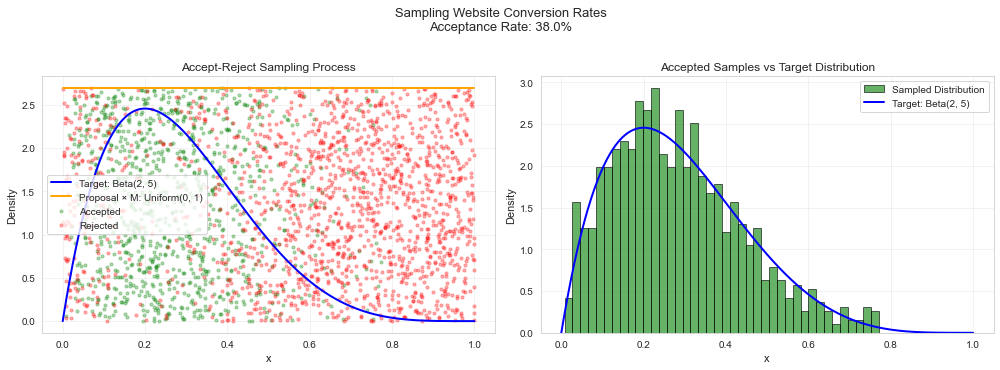

In [102]:
# Mock Data: Sample from a Beta(2, 5) distribution using uniform proposal
# Context: Modeling website conversion rates where most values are between 0.1-0.4
from scipy.stats import beta, uniform

# Target: Beta(2, 5) distribution (models conversion rates)
target_beta = beta(2, 5)
target_dist = {
    'pdf': target_beta.pdf,
    'name': 'Beta(2, 5)'
}

# Proposal: Uniform(0, 1) - simple to sample from
proposal_uniform = {
    'sample': lambda: uniform.rvs(0, 1),
    'pdf': lambda x: 1.0 if 0 <= x <= 1 else 0,
    'name': 'Uniform(0, 1)'
}

# Find M: max of target_pdf / proposal_pdf
# For Beta(2,5) vs Uniform(0,1), the max occurs around x=0.25
M = 2.7  # Empirically chosen to ensure M * proposal >= target everywhere

plot_accept_reject_sampling(target_dist, proposal_uniform, M, n_samples=1000,
                           x_range=(0, 1), 
                           title='Sampling Website Conversion Rates')

## 18) Q-Q Plot (Quantile-Quantile Plot)

**What it is**: A graphical method to check if a dataset follows a theoretical distribution (often normal distribution) by plotting quantiles of the data against quantiles of the theoretical distribution.

**When to use**: Before applying parametric statistical tests that assume normality (t-tests, ANOVA, linear regression), or to identify distribution characteristics (skewness, heavy tails, outliers).

**Key insight**: Points falling on the diagonal line indicate the data matches the theoretical distribution. Deviations show where and how the data differs (S-curves suggest skewness, banana shapes suggest heavy/light tails).

In [103]:
def plot_qq(data, title='Q-Q Plot', distribution='norm'):
    """
    Create a Q-Q plot to assess if data follows a theoretical distribution.
    
    Parameters:
    - data: array-like, the data to plot
    - title: str, plot title
    - distribution: str, theoretical distribution ('norm' for normal, 'uniform', etc.)
    """
    from scipy import stats
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Generate Q-Q plot
    stats.probplot(data, dist=distribution, plot=ax)
    
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel('Theoretical Quantiles', fontsize=11)
    ax.set_ylabel('Sample Quantiles', fontsize=11)
    ax.grid(True, alpha=0.3)
    
    # Add reference line styling
    line = ax.get_lines()[0]  # reference line
    line.set_linewidth(2)
    line.set_color('red')
    line.set_linestyle('--')
    
    plt.tight_layout()
    plt.show()

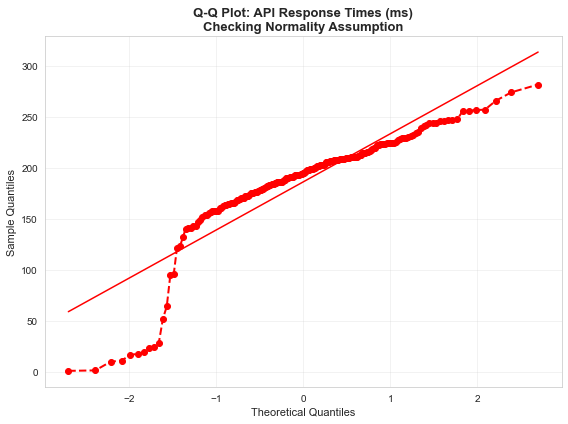

In [104]:
# Mock Data: Response times from a web service (slightly right-skewed)
# Context: API response times in milliseconds - checking if normally distributed
np.random.seed(42)
response_times = np.concatenate([
    np.random.normal(200, 30, 180),  # Normal bulk
    np.random.exponential(50, 20)     # Some outliers (slow responses)
])

plot_qq(response_times, title='Q-Q Plot: API Response Times (ms)\nChecking Normality Assumption')

## 19) Joint Plot

**What it is**: A seaborn plot combining a bivariate scatter or regression plot with marginal distributions (histograms or KDEs) on the axes.

**When to use**: Exploring relationships between two continuous variables while simultaneously seeing their individual distributions. Perfect for understanding both correlation and marginal behavior.

**Key insight**: The center plot shows the relationship, while the side plots reveal the distribution shape of each variable independently, helping identify skewness, outliers, or multimodality.

In [105]:
def plot_jointplot(x, y, data=None, kind='scatter', title='Joint Plot'):
    """
    Create a joint plot showing bivariate relationship with marginal distributions.
    
    Parameters:
    - x: str or array-like, x variable name (if data provided) or values
    - y: str or array-like, y variable name (if data provided) or values
    - data: DataFrame, optional
    - kind: str, 'scatter', 'kde', 'hex', 'reg', or 'resid'
    - title: str, plot title
    """
    g = sns.jointplot(x=x, y=y, data=data, kind=kind, height=8)
    g.fig.suptitle(title, y=1.02, fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

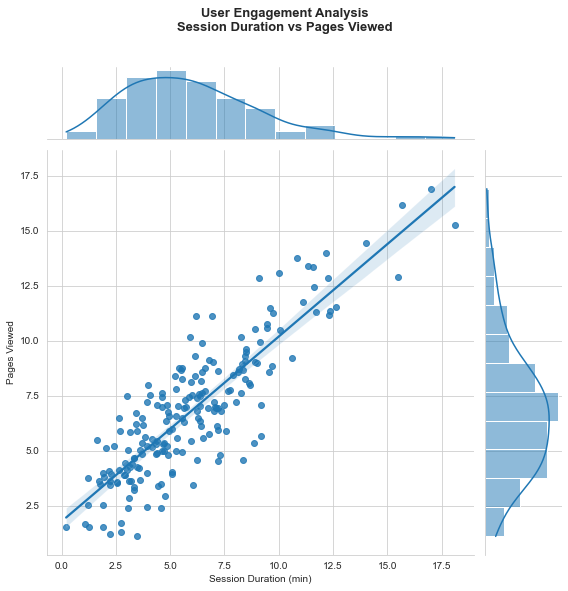

In [106]:
# Mock Data: Customer engagement metrics
# Context: Website session duration vs pages viewed - understanding user behavior
np.random.seed(42)
n_users = 200

session_duration = np.random.gamma(3, 2, n_users)  # minutes
pages_viewed = 2 + 0.8 * session_duration + np.random.normal(0, 1.5, n_users)
pages_viewed = np.maximum(1, pages_viewed)  # at least 1 page

df_engagement = pd.DataFrame({
    'Session Duration (min)': session_duration,
    'Pages Viewed': pages_viewed
})

plot_jointplot('Session Duration (min)', 'Pages Viewed', data=df_engagement, 
               kind='reg', title='User Engagement Analysis\nSession Duration vs Pages Viewed')

## 20) KDE Plot (Kernel Density Estimation)

**What it is**: A smooth, continuous estimate of the probability density function of a variable, created by placing a kernel (usually Gaussian) at each data point and summing them.

**When to use**: When you want a smoother alternative to histograms for visualizing distributions, comparing multiple distributions, or when you need to estimate probability densities for continuous data.

**Key insight**: Unlike histograms which depend on bin choices, KDE provides a smooth curve that better reveals the underlying distribution shape, peaks, and modes.

In [107]:
def plot_kde(data, label=None, title='KDE Plot', multiple_data=None, labels=None):
    """
    Create a Kernel Density Estimation plot.
    
    Parameters:
    - data: array-like, single dataset to plot
    - label: str, label for single dataset
    - title: str, plot title
    - multiple_data: list of arrays, for comparing multiple distributions
    - labels: list of str, labels for multiple datasets
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    if multiple_data is not None:
        # Plot multiple distributions
        for i, dataset in enumerate(multiple_data):
            lbl = labels[i] if labels else f'Distribution {i+1}'
            sns.kdeplot(dataset, label=lbl, linewidth=2, ax=ax)
    else:
        # Plot single distribution
        sns.kdeplot(data, label=label, linewidth=2, fill=True, alpha=0.3, ax=ax)
    
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel('Value', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

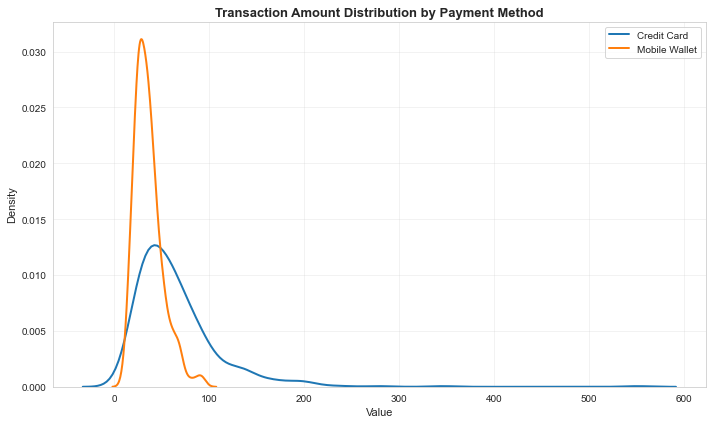

In [108]:
# Mock Data: Transaction amounts from two different payment methods
# Context: Comparing spending patterns between credit card and mobile wallet users
np.random.seed(42)

credit_card = np.random.lognormal(4, 0.6, 500)  # Higher average, wider spread
mobile_wallet = np.random.lognormal(3.5, 0.4, 500)  # Lower average, tighter spread

plot_kde(None, multiple_data=[credit_card, mobile_wallet], 
         labels=['Credit Card', 'Mobile Wallet'],
         title='Transaction Amount Distribution by Payment Method')

## 21) Strip Plot & Swarm Plot

**What it is**: Strip plot shows all individual observations in categorical groups as scattered points. Swarm plot is similar but adjusts point positions to avoid overlap, creating a "beeswarm" effect.

**When to use**: When you want to show all data points (unlike box/violin plots which summarize), especially with small to medium datasets. Swarm plots are better when you need to see exact counts and avoid overplotting.

**Key insight**: These plots reveal the actual sample size, individual outliers, and distribution shape while maintaining the raw data visibility that summary plots lose.

In [109]:
def plot_strip_swarm(data, x, y, hue=None, plot_type='swarm', title='Strip/Swarm Plot'):
    """
    Create a strip plot or swarm plot showing all individual observations.
    
    Parameters:
    - data: DataFrame
    - x: str, categorical variable for x-axis
    - y: str, continuous variable for y-axis
    - hue: str, optional grouping variable
    - plot_type: str, 'strip' or 'swarm'
    - title: str, plot title
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    if plot_type == 'swarm':
        sns.swarmplot(data=data, x=x, y=y, hue=hue, palette='Set2', ax=ax)
    else:
        sns.stripplot(data=data, x=x, y=y, hue=hue, palette='Set2', alpha=0.6, ax=ax)
    
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel(x, fontsize=11)
    ax.set_ylabel(y, fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

/var/folders/bn/w4ms4n5n7l3czmht6p6ntpjm0000gn/T/ipykernel_11809/3940937753.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x=x, y=y, hue=hue, palette='Set2', ax=ax)


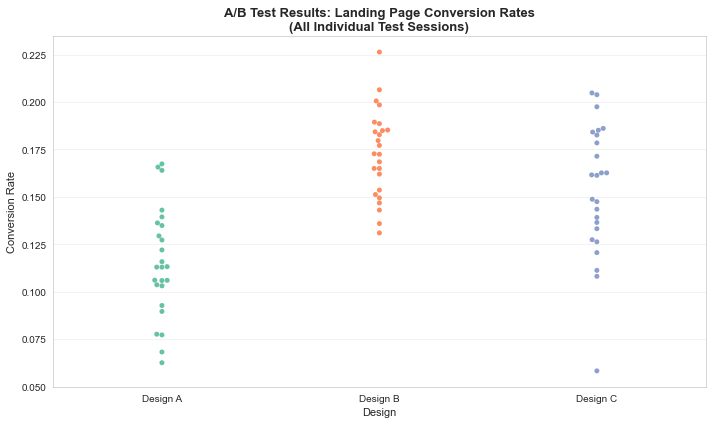

In [110]:
# Mock Data: A/B test results for different UI designs (small sample)
# Context: Conversion rates from 3 landing page designs - want to see all individual test sessions
np.random.seed(42)

designs = ['Design A', 'Design B', 'Design C']
test_data = []

for design in designs:
    if design == 'Design A':
        conversions = np.random.normal(0.12, 0.03, 25)
    elif design == 'Design B':
        conversions = np.random.normal(0.18, 0.025, 25)
    else:
        conversions = np.random.normal(0.15, 0.035, 25)
    
    conversions = np.clip(conversions, 0, 1)  # Keep between 0 and 1
    
    for conv in conversions:
        test_data.append({'Design': design, 'Conversion Rate': conv})

df_abtest = pd.DataFrame(test_data)

plot_strip_swarm(df_abtest, x='Design', y='Conversion Rate', plot_type='swarm',
                 title='A/B Test Results: Landing Page Conversion Rates\n(All Individual Test Sessions)')

## 22) Hexbin Plot

**What it is**: A 2D histogram that divides the plane into hexagonal bins and colors them based on the number of observations falling in each bin.

**When to use**: When you have large scatter datasets (thousands of points) where regular scatter plots become overplotted and unreadable. Hexbins show density patterns clearly.

**Key insight**: Color intensity reveals concentration areas in bivariate data, making it easy to spot clusters, hotspots, and the overall density distribution where scatter plots would just show a blob of points.

In [111]:
def plot_hexbin(x, y, title='Hexbin Plot', gridsize=30, cmap='YlOrRd'):
    """
    Create a hexbin plot for visualizing density in large scatter data.
    
    Parameters:
    - x: array-like, x coordinates
    - y: array-like, y coordinates
    - title: str, plot title
    - gridsize: int, number of hexagons in x-direction
    - cmap: str, colormap name
    """
    fig, ax = plt.subplots(figsize=(10, 7))
    
    hexbin = ax.hexbin(x, y, gridsize=gridsize, cmap=cmap, mincnt=1, edgecolors='face')
    
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel('X', fontsize=11)
    ax.set_ylabel('Y', fontsize=11)
    
    cb = plt.colorbar(hexbin, ax=ax)
    cb.set_label('Count', fontsize=11)
    
    plt.tight_layout()
    plt.show()

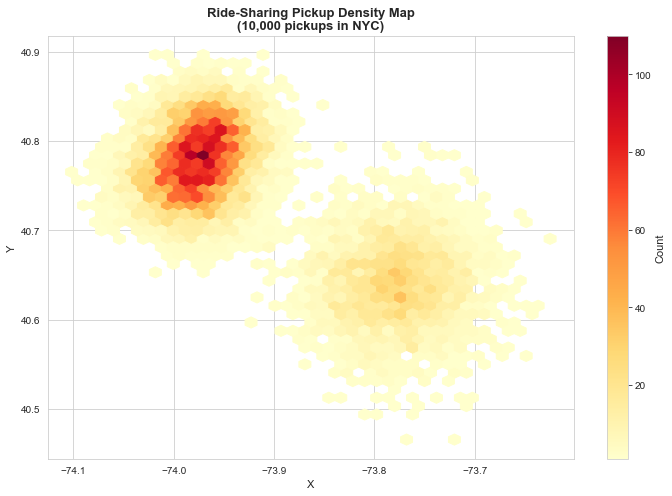

In [112]:
# Mock Data: GPS coordinates of 10,000 ride-sharing pickups
# Context: Analyzing pickup density hotspots in a city
np.random.seed(42)

# Create clusters around 3 hotspots (downtown, airport, university)
cluster1 = np.random.multivariate_normal([40.7589, -73.9851], [[0.001, 0], [0, 0.001]], 4000)  # Times Square
cluster2 = np.random.multivariate_normal([40.6413, -73.7781], [[0.002, 0], [0, 0.002]], 3000)  # JFK Airport
cluster3 = np.random.multivariate_normal([40.8075, -73.9626], [[0.0008, 0], [0, 0.0008]], 3000)  # Columbia Univ

all_pickups = np.vstack([cluster1, cluster2, cluster3])
latitude = all_pickups[:, 0]
longitude = all_pickups[:, 1]

plot_hexbin(longitude, latitude, gridsize=40, 
            title='Ride-Sharing Pickup Density Map\n(10,000 pickups in NYC)')

## 23) Validation Curve

**What it is**: A plot showing training and validation scores as a function of a single hyperparameter, helping identify optimal parameter values and diagnose overfitting/underfitting.

**When to use**: During hyperparameter tuning to understand how a specific parameter (like regularization strength, tree depth, or number of neighbors) affects model performance.

**Key insight**: When training score is high but validation score is low, the model is overfitting. When both are low, it's underfitting. The optimal value is where validation score peaks.

In [113]:
def plot_validation_curve(estimator, X, y, param_name, param_range, cv=5, 
                         scoring='accuracy', title='Validation Curve'):
    """
    Plot validation curve for hyperparameter tuning.
    
    Parameters:
    - estimator: sklearn estimator object
    - X: features
    - y: target
    - param_name: str, name of hyperparameter to vary
    - param_range: array-like, values of the hyperparameter
    - cv: int, cross-validation folds
    - scoring: str, scoring metric
    - title: str, plot title
    """
    from sklearn.model_selection import validation_curve
    
    train_scores, val_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(param_range, train_mean, label='Training Score', marker='o', linewidth=2)
    ax.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
    
    ax.plot(param_range, val_mean, label='Validation Score', marker='s', linewidth=2)
    ax.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2)
    
    ax.set_xlabel(param_name, fontsize=11)
    ax.set_ylabel(f'{scoring.capitalize()} Score', fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

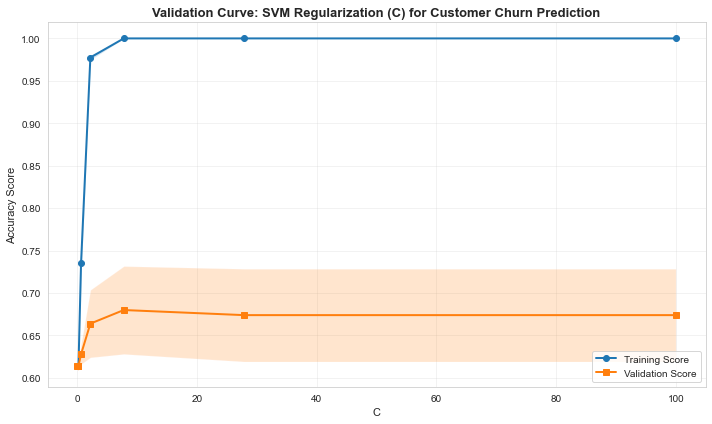

In [114]:
# Mock Data: Customer churn prediction - tuning SVM regularization parameter
# Context: Finding optimal C parameter for SVM classifier
np.random.seed(42)

n_samples_vc = 500
n_features_vc = 20

# Generate synthetic features (customer behavior metrics)
X_vc = np.random.randn(n_samples_vc, n_features_vc)
# Target: churn (1) or not (0) - nonlinear relationship
y_vc = (X_vc[:, 0]**2 + X_vc[:, 1]**2 + np.random.randn(n_samples_vc) * 0.5 > 1).astype(int)

from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', gamma='scale')

# Test different C values (regularization parameter)
param_range_C = np.logspace(-3, 2, 10)

plot_validation_curve(svm_model, X_vc, y_vc, 
                     param_name='C', param_range=param_range_C,
                     cv=5, scoring='accuracy',
                     title='Validation Curve: SVM Regularization (C) for Customer Churn Prediction')

---

## Summary

This cheat sheet covers **23 essential visualization techniques** for data science, numbered sequentially:

### Basic Plots
1. **Line Plot** - Trends and time series
2. **Scatter Plot** - Relationships and correlations
3. **Histogram** - Distribution analysis

### Diagnostic Plots
4. **Residual Plot** - Regression diagnostics
5. **Confusion Matrix** - Classification evaluation
6. **ROC Curve** - Binary classifier performance
7. **Precision-Recall Curve** - Imbalanced classification

### Distribution Analysis
8. **Empirical CDF** - Cumulative distributions (with DKW & Bootstrap confidence bands)
11. **Box Plot** - Quartiles and outliers
12. **Violin Plot** - Distribution density and shape
18. **Q-Q Plot** - Normality testing and distribution diagnostics
20. **KDE Plot** - Smooth density estimation

### Multivariate Analysis
13. **Correlation Heatmap** - Feature relationships
14. **Pair Plot** - Pairwise scatter plots
19. **Joint Plot** - Bivariate relationships with marginal distributions
22. **Hexbin Plot** - Density visualization for large scatter data

### Categorical Plots
15. **Bar Plot** - Aggregated comparisons
16. **Count Plot** - Frequency distributions
21. **Strip/Swarm Plot** - Show all individual observations

### Model Evaluation & Tuning
9. **Explained Variance** - PCA component selection
10. **Learning Curve** - Model bias/variance diagnosis
23. **Validation Curve** - Hyperparameter tuning diagnosis

### Monte Carlo Methods
17. **Accept-Reject Sampling** - Sample from complex distributions

---

**Library Usage:**
- **matplotlib**: Core plotting (1-3, 4, 22)
- **seaborn**: Statistical visualizations (11-16, 19-21)
- **sklearn**: ML diagnostics (5-7, 9-10, 23)
- **scipy**: Statistical methods (8, 17, 18, 20)

Each function is self-contained and ready to use. Simply call with your data!